# Part 1 [30 marks]

### Task 1: Create and Analyze Basic Matrices

***TODO: Import necessary libraries (numpy, scipy, matplotlib)***

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install matplotlib

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mp

***TODO: Create a 3x3 Toeplitz matrix using scipy***

In [3]:
from scipy.linalg import toeplitz

first_column_toeplitz = [1, 2, 3]
first_row_toeplitz = [4, 5,6]

toeplitz_matrix  = sp.linalg.toeplitz(first_column_toeplitz,first_row_toeplitz)

print(toeplitz_matrix)

[[1 5 6]
 [2 1 5]
 [3 2 1]]


***TODO: Create a 3x3 Circulant matrix using scipy.linalg.circulant***

In [4]:
from scipy.linalg import circulant

first_row_circulant = [1, 2, 3]

circulant_matrix  = sp.linalg.circulant(first_row_circulant)
print(circulant_matrix)

[[1 3 2]
 [2 1 3]
 [3 2 1]]


***TODO: Compute the determinant of both matrices using numpy.linalg.det***

In [5]:

toeplitz_det = np.linalg.det(toeplitz_matrix)
circulant_det = np.linalg.det(circulant_matrix)

***TODO: Compute the inverse of both matrices using numpy.linalg.inv***

In [6]:
def is_invertible(matrix):
    try:
        np.linalg.inv(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

In [7]:
try:
    toeplitz_inv = np.linalg.inv(toeplitz_matrix)
except np.linalg.LinAlgError:
    print("Toeplitz Matrix is singular and has no inverse.")

try:
    circulant_inv = np.linalg.inv(circulant_matrix)
except np.linalg.LinAlgError:
    print("Circulant Matrix is singular and has no inverse.")

print(f"Is matrix toeplitz invertible? {is_invertible(toeplitz_matrix)}")
print(f"Is matrix circulant invertible? {is_invertible(circulant_matrix)}")



Is matrix toeplitz invertible? True
Is matrix circulant invertible? True


***TODO: Print the Toeplitz matrix, Circulant matrix, their determinants, and inverses, your results should look like the following***

In [9]:
np.set_printoptions(precision=2)
print(f"Toeplitz Matrix:\n {toeplitz_matrix}")
print(f"Circulant Matrix:\n {circulant_matrix}")

print(f"Toeplitz Matrix Determinant:\n {toeplitz_det}")
print(f"Circulant Matrix Determinant:\n {circulant_det}")
print(f"Toeplitz Matrix Inverse:\n {toeplitz_inv}")
print(f"Circulant Matrix Inverse:\n {circulant_inv}")


Toeplitz Matrix:
 [[1 4 5]
 [2 1 4]
 [3 2 1]]
Circulant Matrix:
 [[1 3 2]
 [2 1 3]
 [3 2 1]]
Toeplitz Matrix Determinant:
 37.99999999999999
Circulant Matrix Determinant:
 17.999999999999996
Toeplitz Matrix Inverse:
 [[-0.18  0.16  0.29]
 [ 0.26 -0.37  0.16]
 [ 0.03  0.26 -0.18]]
Circulant Matrix Inverse:
 [[-0.28  0.06  0.39]
 [ 0.39 -0.28  0.06]
 [ 0.06  0.39 -0.28]]


# Part 2 [50 marks]

**Tasks : Generate and Solve Linear Systems**

In [10]:
# TODO: convert the above 3x3 into 3000x3000:
    # 1. A 3000x3000 Toeplitz matrix using scipy.linalg.toeplitz
n = 3000
col = np.arange(1,n+1)
row = np.arange(1,n+1)
extended_toeplitz = sp.linalg.toeplitz(col, row)
print(f"Extended Toeplitz matrix: {extended_toeplitz.shape}")
print(f"Is matrix toeplitz ext invertible? {is_invertible(extended_toeplitz)}")


Extended Toeplitz matrix: (3000, 3000)
Is matrix toeplitz ext invertible? True


In [11]:
     # 2. A 3000x3000 Circulant matrix using scipy.linalg.circulant
row_circulant = np.arange(1,n+1)
extended_circulant = sp.linalg.circulant(row_circulant)
print(f"Extended Circulant matrix shape: {extended_circulant.shape}")
print(f"Is matrix circulant ext invertible? {is_invertible(extended_circulant)}")

Extended Circulant matrix shape: (3000, 3000)
Is matrix circulant ext invertible? True


In [12]:
# TODO: Create corresponding random vectors b for each system

b_toeplitz = np.random.rand(3000)
b_circulant = np.random.rand(3000)
print(f"vector toeplitz: {b_toeplitz}")
print(f"vector circulant: {b_circulant}")

vector toeplitz: [0.46 0.46 0.13 ... 0.22 0.32 0.55]
vector circulant: [0.24 0.5  0.49 ... 0.4  0.19 0.44]


In [13]:
# TODO: Solve each system Ax = b using numpy's general-purpose solver

try:
    x_toeplitz = np.linalg.solve(extended_toeplitz, b_toeplitz)
    print(f"Solution for Toeplitz system computed successfully.")
    print(f"Toeplitz solution (first 10 elements): {x_toeplitz[:10]}")

except np.linalg.LinAlgError:
    print(f"Toeplitz matrix is singular or not invertible.")

try:
    x_circulant = np.linalg.solve(extended_circulant, b_circulant)
    print(f"Solution for Circulant system computed successfully.")
    print(f"Circulant solution (first 10 elements): {x_circulant[:10]}")
except np.linalg.LinAlgError:
    print(f"Circulant matrix is singular or not invertible.")


Solution for Toeplitz system computed successfully.
Toeplitz solution (first 10 elements): [-0.   -0.16  0.32 -0.12  0.02 -0.15  0.11  0.18 -0.58  0.58]
Solution for Circulant system computed successfully.
Circulant solution (first 10 elements): [ 6.59e-05 -8.80e-05  6.29e-06  6.98e-05  5.57e-05 -2.36e-04 -3.79e-05
  1.12e-04  1.28e-04 -8.11e-06]


In [14]:
# TODO: Solve above toeplitz system using scipy's specialized solvers
from scipy.linalg import solve_toeplitz
try:
    x_toeplitz_specialized = solve_toeplitz((col, row), b_toeplitz)
    print(f"Solution for Toeplitz system (specialized solver) computed successfully.")
    print(f"Specialized Toeplitz solution (first 10 elements): {x_toeplitz_specialized[:10]}")
except np.linalg.LinAlgError:
    print(f"Toeplitz matrix is singular or not invertible using the specialized solver.")

Solution for Toeplitz system (specialized solver) computed successfully.
Specialized Toeplitz solution (first 10 elements): [-0.   -0.16  0.32 -0.12  0.02 -0.15  0.11  0.18 -0.58  0.58]


In [15]:
# TODO: Solve above circulant system using scipy's specialized solvers
from scipy.linalg import solve_circulant
try:
    x_circulant_specialized = solve_circulant(row_circulant,b_circulant)
    print(f"Solution for Circulant system (specialized solver) computed successfully.")
    print(f"Specialized Circulant solution (first 10 elements): {x_circulant_specialized[:10]}")
except np.linalg.LinAlgError:
    print(f"Circulant matrix is singular or not invertible using the specialized solver.")

Solution for Circulant system (specialized solver) computed successfully.
Specialized Circulant solution (first 10 elements): [ 6.59e-05 -8.80e-05  6.29e-06  6.98e-05  5.57e-05 -2.36e-04 -3.79e-05
  1.12e-04  1.28e-04 -8.11e-06]


In [16]:
# Task 2: Compare execution times (import time library here) toeplitz system using scipy's specialized solvers Vs Numpy solution for same system, make sure your results look like in following formate
# Time scipy's specialized solver
import time
start_time_specialized = time.time()
x_toeplitz_specialized = solve_toeplitz((col, row), b_toeplitz)
time_specialized_toeplitz = time.time() - start_time_specialized

# Time NumPy's general solver
start_time_numpy = time.time()
x_toeplitz_numpy = np.linalg.solve(extended_toeplitz, b_toeplitz)
time_numpy_toeplitz = time.time() - start_time_numpy

print(f"Execution Time Comparison:")
print(f"----------------------------")
print(f"Toeplitz system (scipy specialized solver): {time_specialized_toeplitz:.6f} seconds")
print(f"Toeplitz system (numpy general solver): {time_numpy_toeplitz:.6f} seconds")

Execution Time Comparison:
----------------------------
Toeplitz system (scipy specialized solver): 0.074704 seconds
Toeplitz system (numpy general solver): 1.988333 seconds


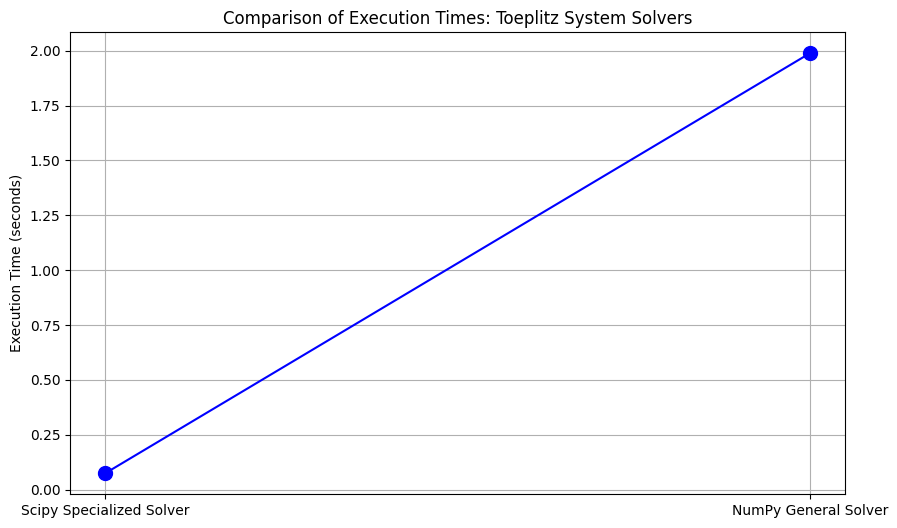

In [18]:

# Task 2: plot the Comparison using plt.plot Execution Times toeplitz system using scipy's specialized solvers Vs Numpy solution for same system
import matplotlib.pyplot as plt

# Sample execution times for the two solvers
execution_times = [time_specialized_toeplitz, time_numpy_toeplitz]
methods = ['Scipy Specialized Solver', 'NumPy General Solver']

plt.figure(figsize=(10, 6))
plt.plot(methods, execution_times, marker='o', linestyle='-', color='b', markersize=10)
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times: Toeplitz System Solvers')
plt.grid(True)
plt.show()



In [20]:
# TODO: Compare Execution Times circulant system using scipy's specialized solvers Vs Numpy solution for same system

import time
start_time_specialized = time.time()
x_circulant_specialized = solve_circulant(row_circulant, b_circulant)
time_specialized_circulant = time.time() - start_time_specialized

start_time_numpy = time.time()
x_circulant_numpy = np.linalg.solve(extended_circulant, b_circulant)
time_numpy_circulant = time.time() - start_time_numpy

print(f"Execution Time Comparison:")
print(f"----------------------------")
print(f"Circulant system (Scipy specialized solver): {time_specialized_circulant:.6f} seconds")
print(f"Circulant system (NumPy general solver): {time_numpy_circulant:.6f} seconds")

Execution Time Comparison:
----------------------------
Circulant system (Scipy specialized solver): 0.003734 seconds
Circulant system (NumPy general solver): 1.682048 seconds


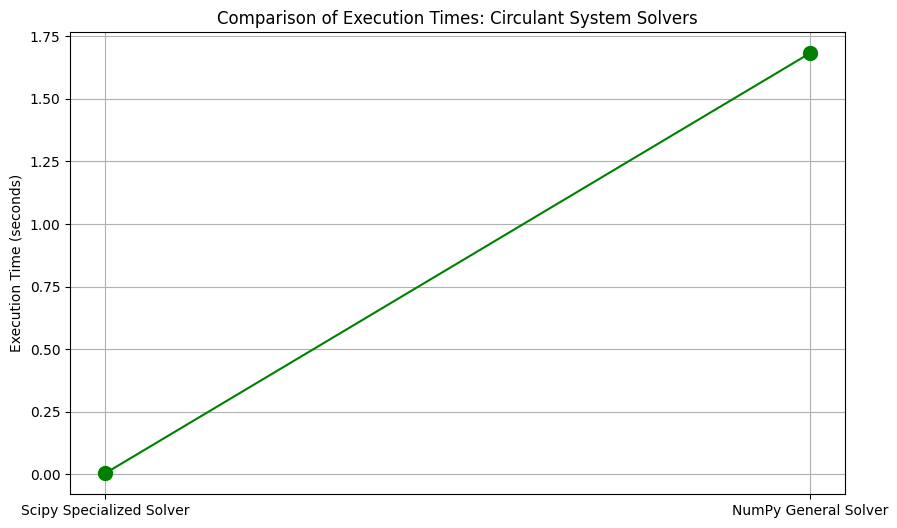

In [21]:
# TODO: plot the Comparison using plt.plot Execution Times circulant system using scipy's specialized solvers Vs Numpy solution for same system
execution_times = [time_specialized_circulant, time_numpy_circulant]
methods = ['Scipy Specialized Solver', 'NumPy General Solver']

plt.figure(figsize=(10, 6))
plt.plot(methods, execution_times, marker='o', linestyle='-', color='g', markersize=10)
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times: Circulant System Solvers')
plt.grid(True)
plt.show()



# Part 3: [50 marks]

***Task 1: Implement a function mm() to perform Naive matrix multiplication***

In [25]:
def mm(A, B):
 
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
        raise ValueError("Number of columns in A must be equal to number of rows in B")

    C = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):  
                C[i][j] += A[i][k] * B[k][j]

    return C


***Task 2: Implement a function mm_vec() to perform Vectorized matrix multiplication***

In [26]:

def mm_vec(A, B):

    return np.array([[np.inner(row, col) for col in B.T] for row in A])



***Task 3: Implenent a function mm_np() that uses numpy to perform matrix multiplication***

In [27]:

def mm_np(A, B):
    return np.matmul(A, B)  


***Task 4: Ensure that mm() and mm_vec() functions perform correct matrix multiplication***

In [28]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

B = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])

C = mm_np(A, B)
print("Using mm_vec()")
print(C)

C = mm_vec(A, B)
print("\nUsing mm()")
print(C)

Using mm_vec()
[[ 58  64]
 [139 154]]

Using mm()
[[ 58  64]
 [139 154]]


***Task 5: Visualize Performance and Results***

Naive mm() time: 0.0012936592102050781 seconds
Vectorized mm_vec() time: 0.003337860107421875 seconds
NumPy mm_np() time: 0.0004634857177734375 seconds


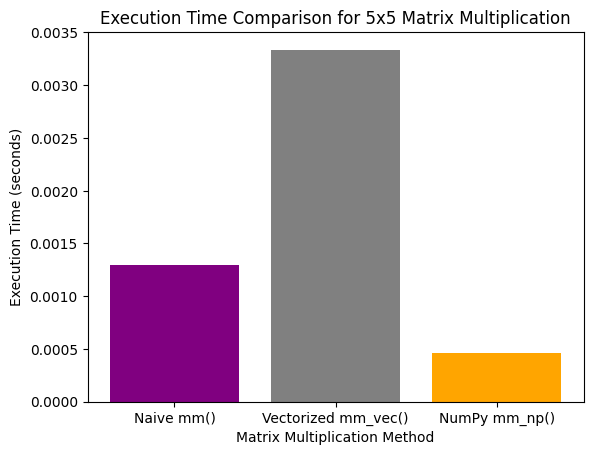

In [29]:
# TODO: Plot the execution time comparisons of the three functions that you implemented for matrix of size 5x5
import time
import matplotlib.pyplot as plt


A = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

B = np.array([
    [25, 24, 23, 22, 21],
    [20, 19, 18, 17, 16],
    [15, 14, 13, 12, 11],
    [10, 9, 8, 7, 6],
    [5, 4, 3, 2, 1]
])

# Measure execution time for each function

# 1. Naive mm() matrix multiplication
start = time.time()
mm(A.tolist(), B.tolist())  
end = time.time()
time_mm = end - start

# 2. Vectorized mm_vec() matrix multiplication
start = time.time()
mm_vec(A, B)
end = time.time()
time_mm_vec = end - start

# 3. NumPy mm_np() matrix multiplication
start = time.time()
mm_np(A, B)
end = time.time()
time_mm_np = end - start

# Print execution times
print(f"Naive mm() time: {time_mm} seconds")
print(f"Vectorized mm_vec() time: {time_mm_vec} seconds")
print(f"NumPy mm_np() time: {time_mm_np} seconds")

# Plot the results
labels = ['Naive mm()', 'Vectorized mm_vec()', 'NumPy mm_np()']
times = [time_mm, time_mm_vec, time_mm_np]

plt.bar(labels, times, color=['purple', 'grey', 'orange'])
plt.xlabel('Matrix Multiplication Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison for 5x5 Matrix Multiplication')
plt.show()



Naive mm() time: 46.33280086517334 seconds
Vectorized mm_vec() time: 1.3694427013397217 seconds
NumPy mm_np() time: 0.04661917686462402 seconds


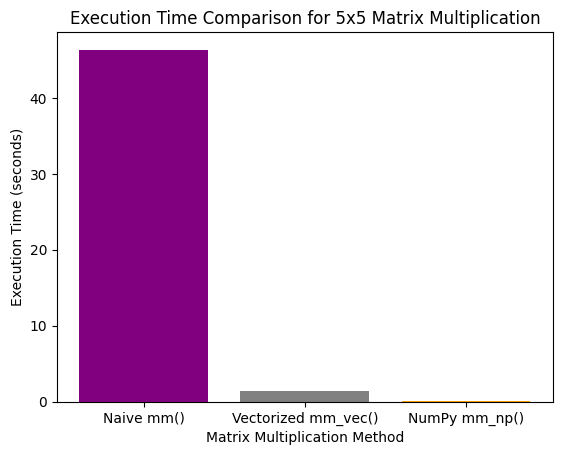

In [30]:
# TODO: Plot the execution time comparisons of the three functions that you implemented for matrix of size 500x500

A = np.random.rand(500, 500)
B = np.random.rand(500, 500)

# Measure execution time for each function

# 1. Naive mm() matrix multiplication
start = time.time()
mm(A.tolist(), B.tolist())  # Convert to list for naive function
end = time.time()
time_mm = end - start

# 2. Vectorized mm_vec() matrix multiplication
start = time.time()
mm_vec(A, B)
end = time.time()
time_mm_vec = end - start

# 3. NumPy mm_np() matrix multiplication
start = time.time()
mm_np(A, B)
end = time.time()
time_mm_np = end - start

# Print execution times
print(f"Naive mm() time: {time_mm} seconds")
print(f"Vectorized mm_vec() time: {time_mm_vec} seconds")
print(f"NumPy mm_np() time: {time_mm_np} seconds")

# Plot the results
labels = ['Naive mm()', 'Vectorized mm_vec()', 'NumPy mm_np()']
times = [time_mm, time_mm_vec, time_mm_np]

plt.bar(labels, times, color=['purple', 'grey', 'orange'])
plt.xlabel('Matrix Multiplication Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison for 5x5 Matrix Multiplication')
plt.show()

#### Conclusion

In [ ]:
# TODO: Analyze the results and write a brief report in the markdown cell, discussing these performance results

## Performance Report: Matrix Multiplication
In this experiment, we compared the execution times of three matrix multiplication implementations using matrices of sizes 5x5 and 500x500. The three implementations are:

1) Naive Implementation (mm): Standard nested loops for matrix multiplication.
2) Vectorized Implementation (mm_vec): Matrix multiplication optimized with vectorized operations.
3) NumPy Implementation (mm_np): Matrix multiplication using the highly optimized NumPy library.

### Results for 5x5 Matrix:
* Naive mm(): 0.00129 seconds
* Vectorized mm_vec(): 0.00333 seconds
* NumPy mm_np(): 0.00046 seconds

### Results for 500x500 Matrix:
* Naive mm(): 46.33 seconds
* Vectorized mm_vec(): 1.37 seconds
* NumPy mm_np(): 0.0466 seconds

### Key Observations:
* 5x5 Matrix: For small matrices, the difference in execution times across the implementations is minimal. The NumPy function is slightly faster, with the naive approach also performing relatively well.

* 500x500 Matrix: As the matrix size increases, the performance gap widens significantly. The naive implementation becomes very slow, taking over 46 seconds, while the vectorized approach shows a considerable improvement. However, NumPy is still the fastest, completing the operation in just 0.0466 seconds.

### Conclusion:
The NumPy implementation consistently outperforms the other two methods due to its efficient use of low-level optimizations. The naive method is inefficient for larger matrices and should be avoided for larger datasets. The vectorized approach offers a good balance between performance and code simplicity, though it still lags behind NumPy.

For real-world applications involving large matrices, the NumPy library is the optimal choice for matrix operations.